# Twitter Data Sentiment Analysis on US Presidential Election 2016

Dataset Collection:
       I decided to use the twitter data during the election period. According to Twitter policy only a week old twitter data will be accessible to normal users. So I surfed through the internet and downloaded twitter data set for this period from Hardvard Dataverse. I particularly decided to chose the dataset collected during the 3 presidential debates.

Data Extraction: 
    The 3 data files contained only the tweet ids. In order to get the complete information from the files, it should be hydarted using a tool called twarc. Using this tool the data set was extracted and collected. 

## Cleaning the dataset 

The procedure to clean the data set, is shown only for the first presidential debate dataset.The same procedure is used for the other two data files also.

In [1]:
import pandas as pd
first = pd.read_json('first-debate.json',lines=True)
first.shape

(236846, 33)

In [2]:
#Dropping out the unnecessary columns
first = first.drop(['withheld_in_countries','truncated','scopes','retweeted_status','retweeted','quoted_status_permalink'],axis=1)
first = first.drop(['quoted_status_id_str','quoted_status_id','quoted_status','possibly_sensitive','is_quote_status'],axis=1)
first = first.drop(['in_reply_to_user_id_str','in_reply_to_user_id','in_reply_to_status_id_str','in_reply_to_status_id'],axis=1)
first = first.drop(['id_str','id','favorited','extended_entities','entities','contributors'],axis=1)
first =first.drop(['in_reply_to_screen_name','user'],axis=1)

In [3]:
#To have tuples only where the "place" column is not null
first = first[first.place.notnull()]
first.shape

(5123, 10)

After droping the unnecessary columns and rows which do not have any values in "place" column we have a total of 5123 entries and 10 columns

In [4]:
#Resetting the index values for the data set
first = first.reset_index(drop=True)

Now, I am going to extract the location and country from which the tweet has been tweeted. This will provide us with the geographical informatio about the user.

In [5]:
#adding "location" and "country" column to the dataset
def location(row):
        location=[]
        text = row['place']['full_name']
        location.append(text)
        return ",".join(location)

first["location"] = first.apply(location,axis=1)
            
def country(row):
    country=[]
    text=row['place']['country']
    country.append(text)
    return ",".join(country)
first['country'] = first.apply(country,axis=1)

After this, I am going to segregate the tweets as per the presidential candidate it is meant for based on the hashtags or names used in it.

In [6]:
def get_candidate(row):
    candidates = []
    text = row["full_text"].lower()
    if "clinton" in text or "hillary" in text or "hillaryclinton" in text or "imwithher" in text or "she" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text or "realdonaldtrump" in text:
        candidates.append("trump")
    return ",".join(candidates)

first["candidate"] = first.apply(get_candidate,axis=1)

Now it is time to do sentiment analysis over the data. For this I am going to use TextBlob library available inbuilt in python

In [10]:
from textblob import TextBlob
def get_sentiments(row):
    senti = []
    text = row["full_text"].lower()
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.0:
        senti.append('positive')
    elif analysis.sentiment.polarity == 0.0:
        senti.append('neutral')
    else:
        senti.append('negative')
    return ",".join(senti)

first["senti"] = first.apply(get_sentiments,axis=1)

In [11]:
first.head(10)

,coordinates,created_at,display_text_range,favorite_count,full_text,geo,lang,place,retweet_count,source,location,country,candidate,senti
0,None,2016-09-26 17:45:52,"[0, 131]",0,@HillaryClinton @realDonaldTrump PLWHA would l...,None,en,"{'id': 'c4095a8d389bd271', 'url': 'https://api...",0,"<a href=""http://twitter.com/download/iphone"" r...","Murrieta, CA",United States,"clinton,trump",neutral
1,None,2016-09-26 17:45:53,"[0, 31]",0,This is pure gold.\n#Debates2016 https://t.co/...,None,en,"{'id': 'cb74aaf709812e0f', 'url': 'https://api...",0,"<a href=""http://twitter.com/download/android"" ...","Tulsa, OK",United States,,positive
2,None,2016-09-26 17:45:58,"[0, 85]",0,.@jmartNYT But Reagan+GWB were also govs of mo...,None,en,"{'id': '58d824d197abba8e', 'url': 'https://api...",0,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...","Lincoln Park, Chicago",United States,,positive
3,None,2016-09-26 17:46:10,"[0, 134]",0,"On @HillaryClinton - @mike_pence says ""Tonight...",None,en,"{'id': 'c5d9f6b9e841e5a8', 'url': 'https://api...",3,"<a href=""http://twitter.com/download/iphone"" r...","Milford, NH",United States,clinton,neutral
4,None,2016-09-26 17:46:11,"[0, 120]",0,FixIt: As voters we need to pursue facts and p...,None,en,"{'id': '01a9a39529b27f36', 'url': 'https://api...",0,"<a href=""http://twitter.com/download/iphone"" r...","Manhattan, NY",United States,,neutral
5,None,2016-09-26 17:46:14,"[16, 130]",0,@HillaryClinton If you think your straight and...,None,en,"{'id': '5acc3a887617d093', 'url': 'https://api...",0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Sarasota, FL",United States,clinton,neutral
6,None,2016-09-26 17:46:17,"[0, 128]",2,#debatenight I can't even imagine the ratings ...,None,en,"{'id': '44c12398792e903e', 'url': 'https://api...",0,"<a href=""http://twitter.com/download/iphone"" r...","Westchase, FL",United States,"clinton,trump",positive
7,None,2016-09-26 17:46:20,"[0, 82]",1,Let's see who gets drunk first. #deplorable #i...,None,en,"{'id': '33c99b76ba74a953', 'url': 'https://api...",0,"<a href=""http://twitter.com/download/iphone"" r...","Port St John, FL",United States,clinton,negative
8,None,2016-09-26 17:46:27,"[0, 86]",1,"It's going to be dinner very shortly, then I'l...",None,en,"{'id': '1c37515518593fe3', 'url': 'https://api...",0,"<a href=""http://twitter.com/download/iphone"" r...","Richmond, London",United Kingdom,,negative
9,"{'type': 'Point', 'coordinates': [-73.5991668,...",2016-09-26 17:46:29,"[0, 61]",0,#hofstra #debate @ Hofstra University https://...,"{'type': 'Point', 'coordinates': [40.71658182,...",es,"{'id': '0427846a106c0bd9', 'url': 'https://api...",0,"<a href=""http://instagram.com"" rel=""nofollow"">...","East Garden City, NY",United States,,neutral


Finally, I am going to add another column for "states".

In [12]:
#To clean the "states" file according to our need. At the end of this processing it will only have the state name and its abbrevation.
dfs = pd.read_csv('states.csv')
dfs = dfs.drop(['States of the United States','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'],axis=1)
dfs = dfs.drop([0],axis=0)
dfs = dfs.drop([1],axis=0)
dfs = dfs.reset_index(drop=True)
dfs.columns = ['State','Abbr']

In [13]:
dfs.head(10)

,State,Abbr
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [14]:
def get_states (row):
    state = []
    if row['country'] == 'United States':
        city = row['location']
        sf = city[-2:]
        for i in range (0,len(dfs.State)):
            if sf == dfs.Abbr[i]:
                state.append(dfs.State[i])
    return ",".join(state)


first['state'] = first.apply(get_states,axis=1)


In [16]:
##Dropping all the tweets which are not tweeted from US
for i in range (0,len(first.full_text)):
    if(first.country[i]!='United States'):
        first = first.drop([i],axis=0) 
first = first.reset_index(drop=True)

In [19]:
##Dropping all the rows which donot have a value in "state" column
for i in range(0,len(first.full_text)):
    if(first.state[i]==''):
        first = first.drop([i],axis=0)

In [21]:
first.shape

(3430, 15)

After Completeing all this process the final first debate dataset had 3430 rows and 15 columns. 

Now I am going to write this in a final first_debate file. This file will be used for further analysis

In [22]:
first.to_json('first-debate_final.json',orient='records',lines=True)

Using the same way,the other two dataset was also cleaned and stored in 'second-deabte_final' and 'third_debate-final' json files.  

# Analysis of the sentiments between Donald Trump and Hillary Clinton

In [1]:
import pandas as pd
first_debate = pd.read_json('first-debate_final.json',lines=True)
second_debate = pd.read_json('second-debate_final.json',lines=True)
third_debate = pd.read_json('third-debate_final.json',lines=True)

In [2]:
tweets1 = first_debate.groupby(['senti','candidate']).count()['full_text']
tweets2 = second_debate.groupby(['senti','candidate']).count()['full_text']
tweets3 = third_debate.groupby(['senti','candidate']).count()['full_text']


In [17]:
##To calculate total count for each sentiment
def count_sentiment(tweets):
    l = []
    l.insert(0,tweets.loc[('positive','clinton')]+tweets.loc[('positive','trump')])
    l.insert(1,tweets.loc[('negative','clinton')]+tweets.loc[('negative','trump')])
    l.insert(2,tweets.loc[('neutral','clinton')]+tweets.loc[('neutral','trump')])
    return l;

In [18]:
first_debate_count = []
first_debate_count= count_sentiment(tweets1)
second_debate_count = []
second_debate_count = count_sentiment(tweets2)
third_debate_count = []
third_debate_count= count_sentiment(tweets3)

In [19]:
from tabulate import tabulate
def display_table(tweets):
    col_lables = ['Sentiment','Clinton','Trump']
    table_vals =[ ['Positive',tweets.loc[('positive','clinton')],tweets.loc[('positive','trump')]],
                 ['Neutral',tweets1.loc[('neutral','clinton')],tweets.loc[('neutral','trump')]],
                 ['Negative',tweets.loc[('negative','clinton')],tweets.loc[('negative','trump')]]]
    print(tabulate(table_vals,headers=col_lables,tablefmt='grid'))

In [20]:
display_table(tweets1)

+-------------+-----------+---------+
| Sentiment   |   Clinton |   Trump |
+=============+===========+=========+
| Positive    |       207 |     164 |
+-------------+-----------+---------+
| Neutral     |       409 |     229 |
+-------------+-----------+---------+
| Negative    |        88 |      79 |
+-------------+-----------+---------+


In [21]:
display_table(tweets2)

+-------------+-----------+---------+
| Sentiment   |   Clinton |   Trump |
+=============+===========+=========+
| Positive    |       236 |     651 |
+-------------+-----------+---------+
| Neutral     |       409 |    1166 |
+-------------+-----------+---------+
| Negative    |       205 |     541 |
+-------------+-----------+---------+


In [22]:
display_table(tweets3)

+-------------+-----------+---------+
| Sentiment   |   Clinton |   Trump |
+=============+===========+=========+
| Positive    |       153 |     386 |
+-------------+-----------+---------+
| Neutral     |       409 |     671 |
+-------------+-----------+---------+
| Negative    |       124 |     213 |
+-------------+-----------+---------+


In [23]:
def calculate_plot_values(x,j):
    y = ['clinton','trump']
    l = []
    for i in y:
        count = tweets1.loc[(x,i)]/first_debate_count[j]
        l.append(count)
        count = tweets2.loc[(x,i)]/second_debate_count[j]
        l.append(count)
        count = tweets3.loc[(x,i)]/third_debate_count[j]
        l.append(count)
        
    return l;

In [24]:
def pie_chart(g1,g2,g3):
    colors = ['red', 'blue']
    fig = plt.figure()
    list_c =['clinton','trump']
    ax1 = fig.add_axes([1, 0, 1.5, .5], aspect=1)
    ax1.pie(g1, labels=list_c, radius = 1.2,startangle = 140,colors = colors, autopct = '%1.1f%%')
    ax2 = fig.add_axes([1.5,0, 1.5, .5], aspect=1)
    ax2.pie(g2, labels=list_c, radius = 1.2, startangle = 140,colors = colors, autopct = '%1.1f%%')
    ax3 = fig.add_axes([1.5,0,2.5,.5],aspect = 1)
    ax3.pie(g3,labels=list_c,radius = 1.2, startangle = 140,colors = colors, autopct = '%1.1f%%')
    

The percentage of positive tweets for each candidate for all 3 debates


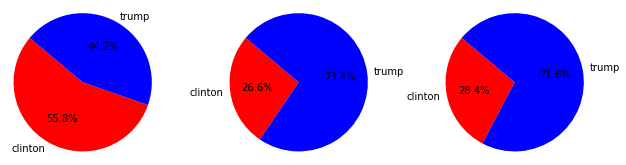

In [25]:
##To calculate percentage of tweets for each sentiment
import matplotlib.pyplot as plt
g = calculate_plot_values('positive',2)
g_f = [g[0]*100,g[3]*100]
g_s = [g[1]*100,g[4]*100]
g_t = [g[2]*100,g[5]*100]
pie_chart(g_f,g_s,g_t)
print("The percentage of positive tweets for each candidate for all 3 debates")
plt.show()

The percentage of negative tweets for each candidate for all 3 debates


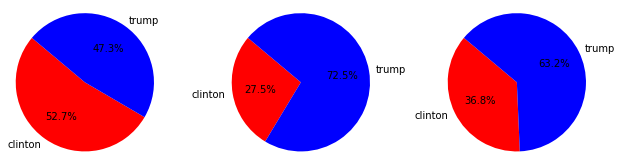

In [26]:
g = calculate_plot_values('negative',1)
g_f = [g[0]*100,g[3]*100]
g_s = [g[1]*100,g[4]*100]
g_t = [g[2]*100,g[5]*100]
pie_chart(g_f,g_s,g_t)
print("The percentage of negative tweets for each candidate for all 3 debates")
plt.show()

The percentage of neutral tweets for each candidate for all 3 debates


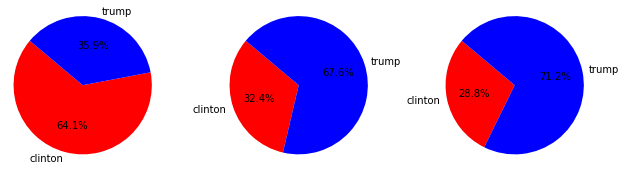

In [27]:
##Pie Chart for neutral tweets 
g = calculate_plot_values('neutral',2)
g_f = [g[0]*100,g[3]*100]
g_s = [g[1]*100,g[4]*100]
g_t = [g[2]*100,g[5]*100]
pie_chart(g_f,g_s,g_t)
print("The percentage of neutral tweets for each candidate for all 3 debates")
plt.show()

From  the above pie charts I can conclude the following observations:
    1. The number of positive tweets increased from 44% to 71.6% for Donald Trump through the 3 debates. By the end of third debate he had a clear majority of positive tweets 
    2. The number of negative tweets sore high for Donald Trump by the second debate, but it fell by 9% in third debate. Even though it was 63% in the end, the percent has dropped by a significant amount then the second debate.
    3. The percent of neutral tweets shows a complete positive slope. By the end of third debate Donald Trump had 71.2% of the neutral tweets

Total Analysis - positive, negative, neutral


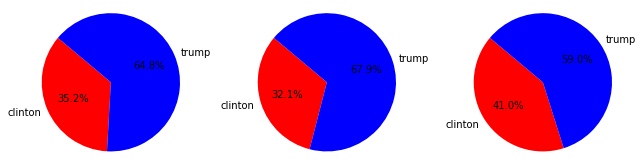

In [28]:
##The overall analysis for each candidate
candidate = ['clinton','trump']
g = []
for y in candidate:
        count = tweets1.loc[('positive',y)]+tweets2.loc[('positive',y)]+tweets3.loc[('positive',y)]/(first_debate_count[0]+second_debate_count[0]+third_debate_count[0])
        g.append(count) 
        count = tweets1.loc[('negative',y)]+tweets2.loc[('negative',y)]+tweets3.loc[('negative',y)]/(first_debate_count[1]+second_debate_count[1]+third_debate_count[1])
        g.append(count)
        count = tweets1.loc[('neutral',y)]+tweets2.loc[('neutral',y)]+tweets3.loc[('neutral',y)]/(first_debate_count[2]+second_debate_count[2]+third_debate_count[2])
        g.append(count)
g_f = [g[0]*100,g[3]*100]
g_s = [g[1]*100,g[4]*100]
g_t = [g[2]*100,g[5]*100]
pie_chart(g_f,g_s,g_t)
print("Total Analysis - positive, negative, neutral")
plt.show()

Overall Analysis in this section is:
    1. Donald Trump held 64.8% of total positive tweets, 67.9% of total negative tweets and 59.0% of total neutral tweets in all 3 debates.
    2. His rivalary, Hillary Clinton held 35.2% of total positive tweets, 32.1% of total negative tweets and 41.0% of total neutral tweets.

Donal Trump has high percentage of negative tweets, but taken into the consideration of the percentage of positive and neutral tweets, he has a winning margin over Hillary Clinton. 

# Analysis part 2 

In this section, I am going to analyze based on region wise tweets for the candidates

In [3]:
tweets1_A = first_debate.groupby(['senti','candidate','state']).count()['full_text']
tweets2_A = second_debate.groupby(['senti','candidate','state']).count()['full_text']
tweets3_A = third_debate.groupby(['senti','candidate','state']).count()['full_text']

In [4]:
def calculate_per_state(z):
    sentiment = ['positive','negative','neutral']
    candidate = ['clinton','trump']
    l = []
    for y in candidate:
        for x in sentiment:
            count = tweets1_A[x][y][z]+tweets2_A[x][y][z]+tweets3_A[x][y][z]
            l.append(count)
    return l
california = calculate_per_state('California')
new_york = calculate_per_state('New York')
florida = calculate_per_state('Florida')
texas = calculate_per_state('Texas')

In [5]:
def calculate_percentage(l):
    total_count=[]
    total_count.append(l[0] + l[3])
    total_count.append(l[1] + l[4])
    total_count.append(l[2] + l[5])
    result=[]
    for i in range(0,6):
        y = (l[i]/total_count[i%3])*100
        result.append(y)
    return result;
california_percentage = calculate_percentage(california)
new_york_percentage = calculate_percentage(new_york)
florida_percentage = calculate_percentage(florida)
texas_percentage = calculate_percentage(texas)

In [6]:
from tabulate import tabulate
def display_table(l):
    col_lables = ['Sentiment','Clinton','Trump']
    table_vals =[ ['Positive',l[0],l[3]],
                 ['Neutral',l[2], l[5]],
                 ['Negative',l[1],l[4]]]
    print(tabulate(table_vals,headers=col_lables,tablefmt='grid'))

In [7]:
display_table(california)

+-------------+-----------+---------+
| Sentiment   |   Clinton |   Trump |
+=============+===========+=========+
| Positive    |       102 |     172 |
+-------------+-----------+---------+
| Neutral     |       203 |     323 |
+-------------+-----------+---------+
| Negative    |        59 |     128 |
+-------------+-----------+---------+


In [8]:
display_table(new_york)

+-------------+-----------+---------+
| Sentiment   |   Clinton |   Trump |
+=============+===========+=========+
| Positive    |        67 |     112 |
+-------------+-----------+---------+
| Neutral     |        92 |     200 |
+-------------+-----------+---------+
| Negative    |        43 |      83 |
+-------------+-----------+---------+


In [9]:
display_table(florida)

+-------------+-----------+---------+
| Sentiment   |   Clinton |   Trump |
+=============+===========+=========+
| Positive    |        78 |     120 |
+-------------+-----------+---------+
| Neutral     |       135 |     175 |
+-------------+-----------+---------+
| Negative    |        52 |      76 |
+-------------+-----------+---------+


In [10]:
display_table(texas)

+-------------+-----------+---------+
| Sentiment   |   Clinton |   Trump |
+=============+===========+=========+
| Positive    |        34 |     103 |
+-------------+-----------+---------+
| Neutral     |        99 |     230 |
+-------------+-----------+---------+
| Negative    |        34 |      76 |
+-------------+-----------+---------+


State wise Conclusion:
    1. California :
            Real result: California was won by the Democrats, that is Hillary Clinton
            According to our analysis: positive percent - 37 %
                                       Neutral percent - 38 %
                                       Negative percent - 30 %
            Even though positive and neutral tweets for Hillary Clinton was less than 40%, the negative tweets were also 30% of the total negative tweets thus giving Hillary a margin support over Republican candidate Donald Trump.
            
    2. Florida:
            Real result : Florida was won by the Republicans, that is Donald Trump
            According to our analysis: positive percent - 60 %
                                       Neutral percent - 56 %
                                       Negative percent - 69 %
            Here, the negative percent is nearly 70%, but yet Donald Trump had a clear majority in positive and negative tweets.Therfore, here Donald Trump did have a majority support.
            
    
    3. New York: 
            Real result : The state of New York was won by Hillary Clinton.
            According to our analysis: postitve % - 37 %
                                       Neutral  % - 31 %
                                       Negative % - 34 %
           This is similar to the trend followed by in the state of California. 
    
    4. Texas: 
           Real result : This state was secured by Donald Trump.
           According to our analysis: positive % - 75 %
                                      Neutral % - 69 %
                                      Negative % - 69 %
           This is again very similar to the state of Florida. 

From tha above analysis, I can conclude that, Donald Trump recieved atleast 60% of positve and neutral tweets when compared to Hillary Clinton. At the same time, he recieved 70% negative tweets throughout. This shows, he had a majority of people tweeting positive and neutral tweets on him then Hillary, which obviously reveals that he was gainig popularity among the citizens on USA. 